# To use this notebook, have data of the following form in a CSV file
![data format example](Ben_CSV_example.jpg)


# Contents

#### 1. Prepare for analysis (import packages and set working directory)
#### 2. Read in, tidy, and explore the data
#### 3. Generate speed trace
#### 4. Generate OffFood/OnFood comparison bar plots (including BSR)
#### 5. Generate phenotype heatmap

# 1 - Prepare for analysis

## 1.1 - Import required packages

In [2]:
import os  # <- package used to work with system filepaths
import pandas as pd  # <- package used to import and organize data
import numpy as np  # <- package used to import and organize data
import math
import seaborn as sns  # <- package used to plot graphs
from matplotlib import pyplot as plt  # <- another package used to plot graphs
from itertools import cycle  # <- package used to iterate down rows
from ipywidgets import widgets  # <- widget tool to generate button
from IPython.display import display  # <- displays button
from tkinter import Tk, filedialog  # <- Tkinter is a GUI package
from tqdm.notebook import tqdm
import pingouin as pg
from pingouin import ttest
from scipy.stats import ttest_ind
from ipyfilechooser import FileChooser
pd.set_option('display.max_columns', 50)
print("done step 1")

done step 1


## 1.2 - Set working directory to where the CSV file with experiment data is

In [3]:
starting_directory='/Users/Joseph/Desktop/'
chooser=FileChooser(starting_directory)
display(chooser)

FileChooser(path='/Users/Joseph/Desktop', filename='', title='', show_hidden=False, select_desc='Select', chan…

In [4]:
folder_path=chooser.selected_path
print(folder_path)

/Users/Joseph/Desktop/BSR_Screen


In [15]:
print(folder_path)
os.chdir(folder_path) #<- setting your working directory so that your images will be saved here

filelist = list() #<- empty list
for root, dirs, files in os.walk(folder_path): #<- this for loop goes through your folder 
    for name in files:
        if name.endswith('.csv'): #<- and takes out all files with a .dat (file that contains your data)
            filepath = os.path.join(root, name) #<- Notes down the file path of each data file
            filelist.append(filepath) #<- saves it into the list
    
print(filelist)
print('done step 3')

/Users/Joseph/Desktop/BSR_Screen
['/Users/Joseph/Desktop/BSR_Screen/BSR_baseline_output_folder_12.csv', '/Users/Joseph/Desktop/BSR_Screen/BSR_baseline_output_folder_13.csv', '/Users/Joseph/Desktop/BSR_Screen/BSR_baseline_output_folder_11.csv', '/Users/Joseph/Desktop/BSR_Screen/BSR_baseline_output_folder_10.csv', '/Users/Joseph/Desktop/BSR_Screen/BSR_baseline_output_folder_14.csv', '/Users/Joseph/Desktop/BSR_Screen/BSR_baseline_output_folder_15.csv', '/Users/Joseph/Desktop/BSR_Screen/BSR_baseline_output_folder_29.csv', '/Users/Joseph/Desktop/BSR_Screen/BSR_baseline_output_folder_9.csv', '/Users/Joseph/Desktop/BSR_Screen/BSR_baseline_output_folder_17.csv', '/Users/Joseph/Desktop/BSR_Screen/BSR_baseline_output_folder_16.csv', '/Users/Joseph/Desktop/BSR_Screen/BSR_baseline_output_folder_8.csv', '/Users/Joseph/Desktop/BSR_Screen/BSR_baseline_output_folder_5.csv', '/Users/Joseph/Desktop/BSR_Screen/BSR_baseline_output_folder_27.csv', '/Users/Joseph/Desktop/BSR_Screen/BSR_baseline_output_folde

In [16]:
# TotalConcatenated_28 = pd.read_csv('BSR_baseline_output_folder_28.csv', on_bad_lines='skip')


In [17]:
# print(TotalConcatenated_28.shape)
# print(TotalConcatenated_28.head())

In [18]:
# TotalConcatenated_28 = TotalConcatenated_28[TotalConcatenated_28.Strain != "N2_OnFood"]

In [19]:
# TotalConcatenated_28.to_csv('BSR_baseline_output_folder_29.csv')
# print('done')

In [26]:
df_list[4]

,Unnamed: 0,time_bin,worm,plate_id,date,time,speed,x,y,angularspeed,pathlength,kink,bias,curve,dir,crab,length,midline,width,morphwidth,area,Strain
0,38152,300.0,2,172151,20230927,299.165800,0.139440,28.718780,29.563340,14.660000,2.175800,9.960000,0.600000,39.120000,0.000000,0.010540,0.838080,1.058440,0.183060,0.094160,0.098998,kvs-4(tm14987)_OffFood
1,38153,300.0,7,175208,20230927,299.502667,0.160217,30.663008,11.715425,6.466667,0.846917,99.008333,-1.000000,43.466667,0.003667,0.028333,0.826875,1.020275,0.243675,0.149075,0.113116,kvs-4(tm14987)_OffFood
2,38154,300.0,11,175208,20230927,299.502667,0.240358,23.599292,34.453783,20.166667,2.345417,43.950000,1.000000,37.775000,0.000667,0.030508,0.844650,1.017283,0.212625,0.142625,0.132010,kvs-4(tm14987)_OffFood
3,38155,300.0,23,152400,20231109,299.492625,0.252300,41.741675,25.744875,7.762500,7.659250,43.312500,1.000000,31.287500,0.000625,0.012937,0.964912,1.065025,0.184613,0.113763,0.115820,kvs-4(tm14987)_OffFood
4,38156,300.0,48,175208,20230927,299.502667,0.207000,19.098600,16.580008,2.950000,0.679333,24.891667,1.000000,26.233333,0.000000,0.009550,0.953550,1.041183,0.110250,0.106192,0.107406,kvs-4(tm14987)_OffFood
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75293,24863,400.0,159,131223,20230421,399.493471,0.177994,36.816635,43.742100,6.147059,43.825235,72.841176,1.000000,36.817647,0.000000,0.025212,0.862729,1.088771,0.306688,0.140024,0.123415,let-19(os33)_OnFood
75294,24864,400.0,160,131223,20230421,399.493471,0.062594,21.250500,25.716312,5.664706,1.059588,27.111765,0.823529,28.711765,0.000000,0.012918,0.908947,0.988982,0.208376,0.117165,0.108407,let-19(os33)_OnFood
75295,24865,400.0,161,131223,20230421,399.493471,0.115694,26.411247,27.896653,5.170588,2.648941,39.823529,1.000000,36.147059,0.000000,0.017771,1.041724,1.190753,0.241094,0.118029,0.129548,let-19(os33)_OnFood
75296,24866,400.0,162,131223,20230421,399.493471,0.042959,41.681306,40.639406,3.064706,0.767000,30.447059,0.294118,24.947059,0.000118,0.010488,1.107476,1.219412,0.236965,0.147659,0.155449,let-19(os33)_OnFood


In [28]:
df_list=[]
for f in tqdm(filelist):  
    file = pd.read_csv(f, on_bad_lines='skip')
    df_list.append(file)
TotalConcatenated = pd.concat(df_list, ignore_index = True)
TotalConcatenated = TotalConcatenated.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'])
print(TotalConcatenated.shape)
print(TotalConcatenated.head())


  0%|          | 0/28 [00:00<?, ?it/s]

(7654701, 21)
   time_bin  worm  plate_id        date       time     speed          x  \
0     300.0    30  153927.0  20221027.0  299.49525  0.204983  23.460192   
1     300.0    38  153927.0  20221027.0  299.49525  0.161775   5.358458   
2     300.0    39  153927.0  20221027.0  299.49525  0.164083  36.993767   
3     300.0    40  153927.0  20221027.0  299.49525  0.202533   4.098067   
4     300.0    41  153927.0  20221027.0  299.49525  0.191475  40.683492   

           y  angularspeed  pathlength       kink  bias      curve       dir  \
0  33.487067      4.250000  -11.505833  31.058333   1.0  27.725000  0.000917   
1  29.773683      2.450000    8.155417  40.766667   1.0  30.808333  0.000167   
2  16.825650      9.458333    4.427333  24.750000   1.0  24.875000  0.000000   
3  25.741108      5.333333    0.588750  54.425000   1.0  30.525000  0.000833   
4  25.382392     19.166667   -3.174000  24.500000  -1.0  33.808333  0.000000   

       crab    length   midline    width  morphwidth  

# 2 - Read in, tidy, and explore the data

## 2.1 - Read in the data, check its size and format

In [5]:
TotalConcatenated = pd.read_csv('BSR_baseline_output.csv')

print(TotalConcatenated.shape)
print(TotalConcatenated.head())
# print(TotalConcatenated.tail())

(4761610, 20)
   Unnamed: 0  time_bin  worm      time     speed          x          y  \
0           0       3.0     1  2.666125  0.352013  21.461862  21.220437   
1           1       3.0     8  2.546000  0.395982  27.712055  24.464291   
2           2       3.0    85  2.744000  0.324933  22.659617  30.046517   
3           3       3.0   165  2.776800  0.280820  19.180400  35.189900   
4           4       3.0   249  2.817250  0.216575  19.060475  24.959625   

   angularspeed  pathlength       kink  bias      curve       dir      crab  \
0    134.875000    0.125875  82.212500   1.0  58.775000  0.004250  0.146800   
1     44.490909    0.181091  59.918182   1.0  47.163636  0.000364  0.067409   
2     26.583333    0.098000  40.850000   1.0  31.516667  0.000000  0.047967   
3     25.580000    0.069400  15.100000   1.0  42.300000  0.000000  0.022700   
4     10.175000    0.044500  61.125000   1.0  38.300000  0.000000  0.031100   

     length   midline     width  morphwidth      area      S

## 2.2 - Get list of strains in the data set

In [31]:
TotalConcatenated_strains = TotalConcatenated.groupby(["Strain", "worm"], as_index=False).mean()
TotalConcatenated_strains[['Genotype', 'Treatment']] = TotalConcatenated_strains['Strain'].str.split('_', expand = True)
TotalConcatenated_strains = TotalConcatenated_strains.dropna()
TotalConcatenated_strains = TotalConcatenated_strains.Genotype.unique()

# print(TotalConcatenated_strains.head())
# print(TotalConcatenated_strains.tail())

print(TotalConcatenated_strains)

all_strains = pd.DataFrame(TotalConcatenated_strains, columns = ['Genotype'])
print(all_strains)

['C29E4.10(ok2752)' 'F53B2.5(ok226)' 'N2' 'R07G3.8(tm5683)'
 'SSSD1.1(ok1527)' 'Y18D10A.22(ok3535)' 'acr-12(ok367)' 'acr-3(ok2049)'
 'acr-6(ok3117)' 'acr-8(ok1240)' 'bas-1(tm351)' 'cat-1(e1111)'
 'cat-1(ok411)' 'cat-2(e1112)' 'cat-2(n4547)' 'cat-2(tm2261)'
 'cat-4(e1141)' 'cat-4(tm773)' 'catp-6(ok3473)' 'catp-7(tm4438)'
 'catp-7(tm8556)' 'chd-7(tm6183)' 'cpr-4(ok3413)' 'cpr-4(tm3718)'
 'cpr-5(ok2344)' 'cpr-5(rb1810)' 'cpr-6(tm12210)' 'cpr-8(ok2956)'
 'crls-1(tm2542)' 'crls-1(tm2575)' 'djr-1.1(tm918)' 'djr-1.2(tm1346)'
 'djr-1.2(tm817)' 'djr-1.2(tm951)' 'dnj-25(ok422)' 'dop-1(vs101)'
 'dop-3(ok295)' 'dop-3(tm1356)' 'exp-2(sa26ad1426)' 'exp-2(tm5668)'
 'gba-1(tm3816)' 'gba-1(tm4173)' 'gba-2(tm4623)' 'gba-2(tm4808)'
 'gba-3(gk3287)' 'gba-3(tm3302)' 'gba-4(tm3314)' 'gba-4(tm3349)'
 'gck-3(tm1223)' 'gck-3(tm1296)' 'glo-1(tm15275)' 'glo-1(tm3240)'
 'glo-1(zu391)' 'hipr-1(ok1081)' 'hipr-1(tm14191)' 'igcm-2(ok1527)'
 'kvs-1(tm2034)' 'kvs-2(tm6231)' 'kvs-2(tm6358)' 'kvs-3(nf140)'
 'kvs-4(tm1051

## 2.3 - Determine the range for which you want to analyze data

In [32]:
start = 200  # <----- set the start time of the range
point = 400  # <----- set the end time of your range

TotalConcatenated_chunked0 = TotalConcatenated[TotalConcatenated["time"] >= start]
TotalConcatenated_chunked = TotalConcatenated_chunked0[TotalConcatenated_chunked0["time"] <= point]

## 2.4 - Find average measures for each worm (across duration of specified range), split 'Strain' column into two

Ex: 'N2_OnFood' becomes 'N2' & 'OnFood'

In [53]:
TotalConcatenated_mean = TotalConcatenated_chunked.groupby(["Strain", "worm"], as_index=False).mean()
TotalConcatenated_mean[['Genotype', 'Treatment']] = TotalConcatenated_mean['Strain'].str.split('_', expand = True)
TotalConcatenated_mean[['Gene','Allele']]=TotalConcatenated_mean['Genotype'].str.split('(',expand=True)
TotalConcatenated_mean['Allele']=TotalConcatenated_mean['Allele'].str[:-1]
# print(TotalConcatenated_mean.groupby(['Gene'], as_index = False).mean())
# # TotalConcatenated_mean['Gene']=TotalConcatenated['Gene'].fill_na('N2')
# print(TotalConcatenated_mean.Gene.unique())

# SELECT ONLY NECESSARY COLUMNS
TotalConcatenated_worm_avg_speed = TotalConcatenated_mean[['Gene','Genotype', 'Treatment', 'Strain', 'speed']]
print(TotalConcatenated_worm_avg_speed)
By_gene_avg_speed=TotalConcatenated_mean[['Gene','Treatment', 'speed']]
print(By_gene_avg_speed)

           Gene          Genotype Treatment                    Strain  \
0      C29E4.10  C29E4.10(ok2752)   OffFood  C29E4.10(ok2752)_OffFood   
1      C29E4.10  C29E4.10(ok2752)   OffFood  C29E4.10(ok2752)_OffFood   
2      C29E4.10  C29E4.10(ok2752)   OffFood  C29E4.10(ok2752)_OffFood   
3      C29E4.10  C29E4.10(ok2752)   OffFood  C29E4.10(ok2752)_OffFood   
4      C29E4.10  C29E4.10(ok2752)   OffFood  C29E4.10(ok2752)_OffFood   
...         ...               ...       ...                       ...   
75591    vps-35    vps-35(ok1880)    OnFood     vps-35(ok1880)_OnFood   
75592    vps-35    vps-35(ok1880)    OnFood     vps-35(ok1880)_OnFood   
75593    vps-35    vps-35(ok1880)    OnFood     vps-35(ok1880)_OnFood   
75594    vps-35    vps-35(ok1880)    OnFood     vps-35(ok1880)_OnFood   
75595    vps-35    vps-35(ok1880)    OnFood     vps-35(ok1880)_OnFood   

          speed  
0      0.177988  
1      0.150072  
2      0.251967  
3      0.138426  
4      0.152337  
...         ...

## 2.5 - Find average speed measures for each genotype and treatment (across duration of specified range)

In [55]:
TotalConcatenated_avg_speed = TotalConcatenated_worm_avg_speed.groupby(['Gene','Strain', 'Treatment', 'Genotype'], as_index = False).mean()
print(TotalConcatenated_avg_speed)

# print(TotalConcatenated_avg_speed['speed'][1])

ByGene_avg_speed = By_gene_avg_speed.groupby(['Gene','Treatment'], as_index = False).mean()
print(ByGene_avg_speed)
ByGene_avg_speed.to_csv('ByGene_avg_speed.csv')

             Gene                             Strain Treatment  \
0        C29E4.10           C29E4.10(ok2752)_OffFood   OffFood   
1        C29E4.10            C29E4.10(ok2752)_OnFood    OnFood   
2         F53B2.5             F53B2.5(ok226)_OffFood   OffFood   
3         F53B2.5              F53B2.5(ok226)_OnFood    OnFood   
4            LRRK               LRRK(G2019S)_OffFood   OffFood   
..            ...                                ...       ...   
270  unc119-ABeta  unc119-ABeta(myo2control)_OffFood   OffFood   
271        vps-35               vps-35(hu68)_OffFood   OffFood   
272        vps-35                vps-35(hu68)_OnFood    OnFood   
273        vps-35             vps-35(ok1880)_OffFood   OffFood   
274        vps-35              vps-35(ok1880)_OnFood    OnFood   

                      Genotype     speed  
0             C29E4.10(ok2752)  0.220590  
1             C29E4.10(ok2752)  0.146546  
2               F53B2.5(ok226)  0.123559  
3               F53B2.5(ok226)  0.0

In [75]:
ByGene_avg_speed1=ByGene_avg_speed.copy()
ByGene_avg_speed1=ByGene_avg_speed1.replace('Food', 'OnFood')
ByGene_avg_speed1=ByGene_avg_speed1.replace('NoFood', 'OffFood')
ByGene_avg_speed1=ByGene_avg_speed1.replace('Onfood', 'OnFood')

# ByGene_avg_speed = pd.read_csv('ByGene_avg_speed.csv')
ByGene_avg_speed1 = ByGene_avg_speed1.groupby(['Gene','Treatment'], as_index = False).mean()
ByGene_avg_speed1

,Gene,Treatment,speed
0,C29E4.10,OffFood,0.220590
1,C29E4.10,OnFood,0.146546
2,F53B2.5,OffFood,0.123559
3,F53B2.5,OnFood,0.053344
4,LRRK,OffFood,0.183015
...,...,...,...
153,unc-57,OnFood,0.030208
154,unc119-ABeta,OffFood,0.197418
155,unc119-ABeta,OnFood,0.104578
156,vps-35,OffFood,0.075013


## 2.6 - Generate dataframe containing only data for N2 and CB1112 for use in speed trace

In [25]:
print(TotalConcatenated_avg_speed.Allele.unique())

['ok2752' 'ok226' 'ok3535' 'ok367' 'ok2049' 'ok3117' 'ok1240' 'tm351'
 'e1111' 'ok411' 'e1112' 'e1141' 'tm773' 'ok347' 'ok3473' 'tm6183'
 'tm2542' 'tm2575' 'tm1346' 'ok422' 'vs101' 'ok295' 'tm1356' 'gk3287'
 'tm3302' 'tm1223' 'tm1296' 'tm15275' 'tm3240' 'zu391' 'tm14191'
 'gk149538' 'os33' 'tm1898' 'tm7568' 'pk1389' 'tm1207' 'tm1277' 'spr-10'
 'spr5' 'spr6' 'spr7' 'spr9' 'zu155' 'gk448' 'tm598' 'ok3538' 'tm1779'
 'gk1208' 'n4589' 'ok952' 'ok879' 'ok1434' 'gk247' 'ad591' 'hu68' 'ok1880']


In [37]:
list=['N2', 'cat-2']
print(TotalConcatenated_avg_speed[TotalConcatenated_avg_speed['Gene'].isin(list)])

     Gene                Strain Treatment      Genotype     speed
4      N2            N2_OffFood   OffFood            N2  0.193063
5      N2             N2_OnFood    OnFood            N2  0.098874
22  cat-2  cat-2(e1112)_OffFood   OffFood  cat-2(e1112)  0.209021
23  cat-2   cat-2(e1112)_OnFood    OnFood  cat-2(e1112)  0.190607


In [38]:
N2_cat2 = ['N2_OffFood', 'N2_OnFood', 'cat-2(e1112)_OffFood', 'cat-2(e1112)_OnFood']
TotalN2cat2 = TotalConcatenated[TotalConcatenated['Strain'].isin(N2_cat2)]

print(TotalN2cat2.shape)
print(TotalN2cat2.head())

(1786511, 20)
   Unnamed: 0  time_bin  worm      time     speed          x          y  \
0           0       3.0     1  2.666125  0.352013  21.461862  21.220437   
1           1       3.0     8  2.546000  0.395982  27.712055  24.464291   
2           2       3.0    85  2.744000  0.324933  22.659617  30.046517   
3           3       3.0   165  2.776800  0.280820  19.180400  35.189900   
4           4       3.0   249  2.817250  0.216575  19.060475  24.959625   

   angularspeed  pathlength       kink  bias      curve       dir      crab  \
0    134.875000    0.125875  82.212500   1.0  58.775000  0.004250  0.146800   
1     44.490909    0.181091  59.918182   1.0  47.163636  0.000364  0.067409   
2     26.583333    0.098000  40.850000   1.0  31.516667  0.000000  0.047967   
3     25.580000    0.069400  15.100000   1.0  42.300000  0.000000  0.022700   
4     10.175000    0.044500  61.125000   1.0  38.300000  0.000000  0.031100   

     length   midline     width  morphwidth      area      S

# 3 - Generate speed trace

<Figure size 640x480 with 0 Axes>

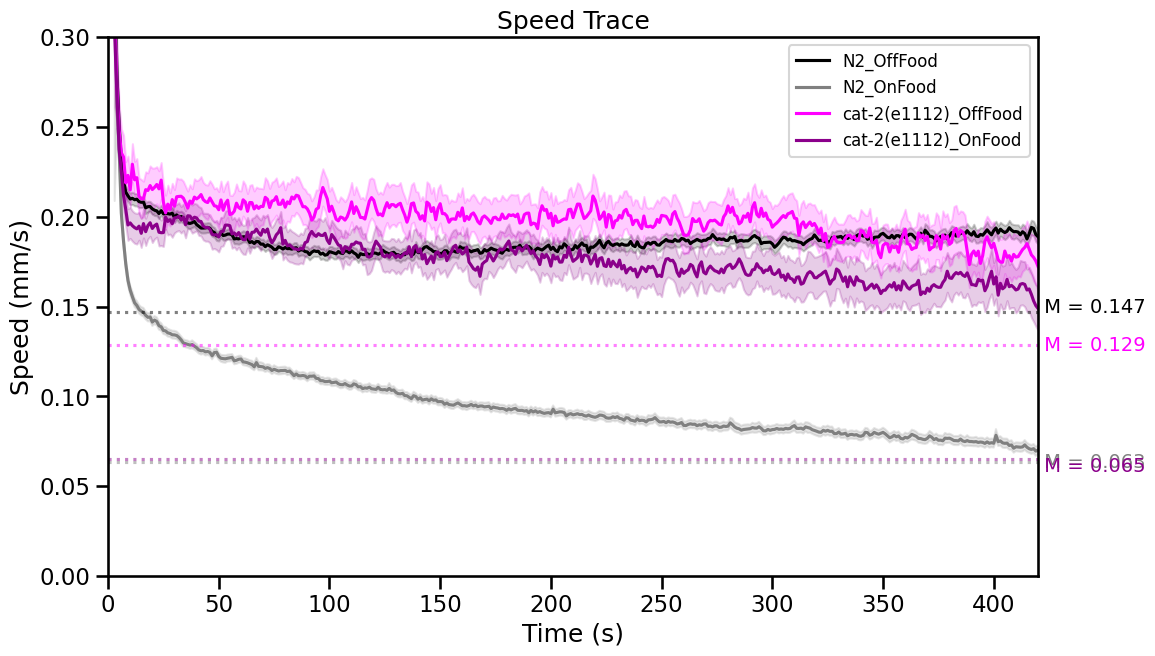

In [19]:
# Setting viewing range for your graph
top = 0.30
bottom = 0
left = 0
right = 420

# Set specifications for graph
sns.set_context("talk")
plt.figure(linewidth = 2.5)
plt.figure(figsize = (12, 7))
plt.gca().xaxis.grid(False)

# Specify data and colours to be used
ax = sns.lineplot(x = "time_bin",
                  y = "speed",
                  # data = TotalConcatenated,  # <----- uncomment and comment row below if using all data
                  data = TotalN2cat2,
                  hue = 'Strain',
                  palette = ['black',
                             'grey',
                             '#FF00FF',
                             '#8B008B',
                             # 'green',  # <----- uncomment additional colours if analyzing more strains (2 per strain)
                             # 'lightgreen',
                             # 'royalblue',
                             # 'lightblue',
                             # '#FFB5C5',
                             # '#CD6889'
                            ])

# Specify labels
plt.xlabel("Time (s)")
plt.ylabel("Speed (mm/s)")
plt.title("Speed Trace")

# Specify viewing range using variables at top of cell
plt.ylim(top = top)
plt.ylim(bottom = bottom)
plt.xlim(left= left)
plt.xlim(right = right)

# Add horizontal lines to visualize mean speed of each strain and condition (comment out if using more than N2 & CB1112)
# If keeping uncommented, may need to adjust indexing to calculate proper speeds
plt.axhline(y = TotalConcatenated_avg_speed['speed'][0], color = 'black', linestyle = ':', alpha = 0.5)
plt.axhline(y = TotalConcatenated_avg_speed['speed'][1], color = 'grey', linestyle = ':', alpha = 0.5)
plt.axhline(y = TotalConcatenated_avg_speed['speed'][4], color = '#FF00FF', linestyle = ':', alpha = 0.5)
plt.axhline(y = TotalConcatenated_avg_speed['speed'][5], color = '#8B008B', linestyle = ':', alpha = 0.5)

# Add annotations to show mean speed of each strain and condition
# Same caution as previous step regarding proper speeds
ax.annotate(f" M = {round(TotalConcatenated_avg_speed['speed'][0], 3)}",
            xy = (420, TotalConcatenated_avg_speed['speed'][0]),
            xytext = (420, TotalConcatenated_avg_speed['speed'][0]),
            color = 'black', size = 14)
ax.annotate(f" M = {round(TotalConcatenated_avg_speed['speed'][1], 3)}",
            xy = (420, TotalConcatenated_avg_speed['speed'][1] - 0.003),
            xytext = (420, TotalConcatenated_avg_speed['speed'][1] - 0.003),
            color = 'grey', size = 14)
ax.annotate(f" M = {round(TotalConcatenated_avg_speed['speed'][4], 3)}",
            xy = (420, TotalConcatenated_avg_speed['speed'][4] - 0.003),
            xytext = (420, TotalConcatenated_avg_speed['speed'][4] - 0.003),
            color = '#FF00FF', size = 14)
ax.annotate(f" M = {round(TotalConcatenated_avg_speed['speed'][5], 3)}",
            xy = (420, TotalConcatenated_avg_speed['speed'][5] - 0.005),
            xytext = (420, TotalConcatenated_avg_speed['speed'][5] - 0.007),
            color = '#8B008B', size = 14)

# Specify location for legend
ax.legend(loc = 'upper right', fontsize = '12'
          # , labels = ['N2 (Off Food)', 'N2 (On Food)', 'CB1112 (Off Food)', 'CB1112 (On Food)']
         )

# Save figure to current working directory
plt.savefig(f'Speed_Trace_{left}to{right}s.jpg', format = 'jpg', dpi = 450)

plt.show()

# 4 - Generate OffFood/OnFood comparison bar plots

## 4.1 - BSR bar plots (difference of differences and difference of percent change)

### 4.1.1 - First, take data only from the time in the experiment(s) you want to analyze, and find the average speed for each genotype and treatment

In [10]:
# print(TotalConcatenated.head(1))

start = 200  # <----- set the start time of the range
point = 400  # <----- set the end time of your range

# Take data between specified time points
chunkeddata0 = TotalConcatenated[TotalConcatenated["time"] >= start]
chunkeddata = chunkeddata0[chunkeddata0["time"] <= point]

# Take mean of all measures for each worm
chunkeddata_mean = chunkeddata.groupby(["Strain", "worm"], as_index = False).mean()

# Split `Strain` column into `Genotype` and `Treatment` columns
chunkeddata_mean[['Genotype', 'Treatment']] = chunkeddata_mean['Strain'].str.split('_', 1, expand=True)

# Select only the specified columns from previous result (others not important for BSR score)
worm_avg_speed = chunkeddata_mean[['Genotype', 'Treatment', 'Strain', 'speed']]

# Take mean speed for each genotype and treatment (should result in 2 rows for each genotype - 1 for each condition)
avg_speed = worm_avg_speed.groupby(["Strain", 'Treatment', 'Genotype'], as_index = False).mean()
print(avg_speed)
# avg_speed.to_csv("avg_speed.csv")

                     Strain Treatment         Genotype     speed
0                N2_OffFood   OffFood               N2  0.184379
1                 N2_OnFood    OnFood               N2  0.099498
2   R07G3.8(tm5683)_OffFood   OffFood  R07G3.8(tm5683)  0.162167
3    R07G3.8(tm5683)_OnFood    OnFood  R07G3.8(tm5683)  0.074619
4      cat-2(e1112)_OffFood   OffFood     cat-2(e1112)  0.206655
5       cat-2(e1112)_OnFood    OnFood     cat-2(e1112)  0.179703
6     gba-2(tm4623)_OffFood   OffFood    gba-2(tm4623)  0.165796
7      gba-2(tm4623)_OnFood    OnFood    gba-2(tm4623)  0.067302
8     gba-4(tm3314)_OffFood   OffFood    gba-4(tm3314)  0.134118
9      gba-4(tm3314)_OnFood    OnFood    gba-4(tm3314)  0.058023
10   hipr-1(ok1081)_OffFood   OffFood   hipr-1(ok1081)  0.183672
11    hipr-1(ok1081)_OnFood    OnFood   hipr-1(ok1081)  0.086518
12   igcm-2(ok1527)_OffFood   OffFood   igcm-2(ok1527)  0.169181
13    igcm-2(ok1527)_OnFood    OnFood   igcm-2(ok1527)  0.101381
14   lfe-2(tm14109)_OffFo

<ipython-input-10-8d520cdde17a>:14: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  chunkeddata_mean[['Genotype', 'Treatment']] = chunkeddata_mean['Strain'].str.split('_', 1, expand=True)


### 4.1.2 - Then, calculate the difference in speed between conditions for each genotype (in mm/s), as well as the percent change in speed relative to OffFood speed for each genotype

In [51]:
pd.set_option('display.max_columns', 200)
ByGene_avg_speed

,Gene,speed
0,C29E4.10,0.220590
1,C29E4.10,0.146546
2,F53B2.5,0.123559
3,F53B2.5,0.053344
4,LRRK,0.183015
...,...,...
160,unc-57,0.030208
161,unc119-ABeta,0.197418
162,unc119-ABeta,0.104578
163,vps-35,0.075013


In [74]:
ByGene_avg_speed1
ByGene_avg_speed1.to_csv('ByGene_avg_speed1.csv')

In [72]:
ByGene_speed_diff

,Basal Slowing
0,0.074043
2,0.070215
4,0.110027
6,0.093782
8,0.113898
...,...
149,0.013852
151,0.014208
153,-0.008624
155,0.092840


In [71]:
ByGene_avg_speed1['Gene'].unique()

array(['C29E4.10', 'F53B2.5', 'LRRK', 'N2', 'R07G3.8', 'SSSD1.1',
       'T20F7.3', 'Y18D10A.22', 'acr-12', 'acr-3', 'acr-6', 'acr-8',
       'bas-1', 'cat-1', 'cat-2', 'cat-4', 'catp-6', 'catp-7', 'chd-7',
       'cpr-2', 'cpr-4', 'cpr-5', 'cpr-6', 'cpr-8', 'cpr-9', 'crls-1',
       'dat1-hSNCA', 'djr-1.1', 'djr-1.2', 'dnj-25', 'dop-1', 'dop-3',
       'dve-1', 'exp-2', 'gba-1', 'gba-2', 'gba-3', 'gba-4', 'gbf-1',
       'gck-3', 'glo-1', 'hipr-1', 'igcm-2', 'kvs-1', 'kvs-2', 'kvs-3',
       'kvs-4', 'kvs-5', 'let-19', 'lfe-2', 'lrk-1', 'mbk-1', 'mbl-1',
       'mbr-1', 'mex-3', 'mop-25.1', 'ncs-4', 'ncs-5', 'ncs-7', 'pamn-1',
       'pdr-1', 'pink-1', 'rme-8', 'rskd-1', 'sac-2', 'scav-1', 'scav-2',
       'scav-5', 'set-2', 'sipa-1', 'snb-5', 'snb-7', 'snb1-LRRK2',
       'tag-138', 'unc-10', 'unc-43', 'unc-57', 'unc119-ABeta', 'vps-35'],
      dtype=object)

In [78]:
ByGene_avg_speed1 = ByGene_avg_speed1.drop(columns = ["Treatment"])
ByGene_speed_diff = ByGene_avg_speed1.groupby("Gene", as_index = False).diff(periods = -1).dropna()
ByGene_speed_diff.columns=['Basal Slowing']
ByGene_speed_diff.insert(loc = 0, column = 'Gene', value = ByGene_avg_speed1['Gene'].unique())
ByGene_speed_diff


KeyError: "['Treatment'] not found in axis"

In [96]:
ByGene_speed_diff = ByGene_speed_diff[ByGene_speed_diff.Gene != 'dat1-hSNCA']
ByGene_speed_diff = ByGene_speed_diff[ByGene_speed_diff.Gene != 'snb1-LRRK']
ByGene_speed_diff = ByGene_speed_diff[ByGene_speed_diff.Gene != 'LRRK']
ByGene_speed_diff = ByGene_speed_diff[ByGene_speed_diff.Gene != 'unc119-ABeta']
# ByGene_speed_diff.drop(ByGene_speed_diff.Gene == ['dat1-hSNCA', 'snb1-LRRK','LRRK','unc119-ABeta'])

<Figure size 640x480 with 0 Axes>

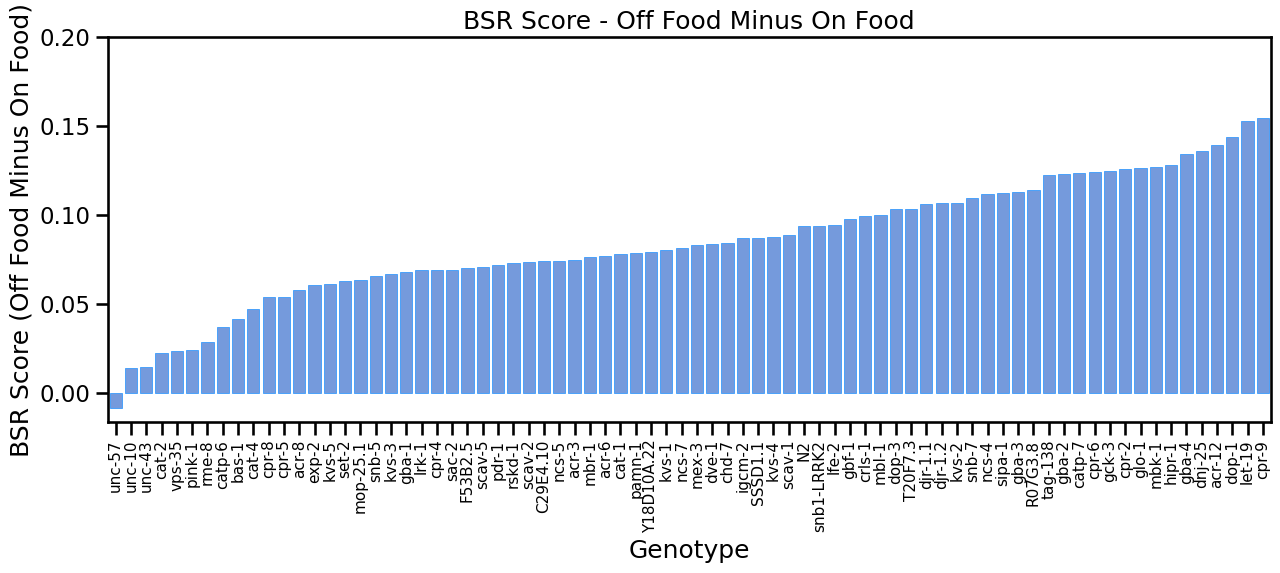

In [99]:
Title = "BSR Score - Off Food Minus On Food"  # <---------------- Input Here -----------------
sns.set_context("talk")
plt.figure(linewidth = 1)
plt.figure(figsize = (15, 5))
plt.gca().xaxis.grid(False)
ax = sns.barplot(x = 'Gene', 
             y = 'Basal Slowing', 
             data = ByGene_speed_diff.sort_values(by=['Basal Slowing']),  # <--------------- Input Here -------------
             color = 'CornflowerBlue',
             edgecolor = "DodgerBlue",
             linewidth = 0.5,
#              seed=5,
#              ci = 95, # 'sd' for SD, '68' for SEM
#              palette = ['grey',
#                         'black'
#                        ]
                )
plt.xlabel("Genotype")
plt.xticks(rotation = 90, fontsize=11)
plt.ylabel("BSR Score (Off Food Minus On Food)")
plt.ylim(top = 0.20)
# plt.ylim(bottom = -0.1)
# plt.ylim(top = 0.07)
# plt.ylim(bottom = -0.07)
plt.title(Title)
# plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.savefig(f'{Title}.jpg', format = 'jpg', dpi = 450, bbox_inches = 'tight')
plt.show()

In [11]:
# ABSOLUTE DIFFERENCE
# Drop `Strain` and `Treatment` columns, group by `Genotype` (without making index based on `Genotype`)
# Then, for each `Genotype`, subtract OnFood from OffFood speed
speed_diff = avg_speed.drop(columns = ["Strain", "Treatment"])
speed_diff = speed_diff.groupby("Genotype", as_index = False).diff(periods = -1).dropna()

# rename difference column to 'speed_diff'
speed_diff.columns = ['speed_diff']

print(speed_diff)

# PERCENT DIFFERENCE
avg_speed['speed_pct_diff'] = avg_speed.groupby('Genotype', as_index = False)['speed'].apply(lambda x: (x - x.shift(-1)) / x)
speed_pct_diff = avg_speed['speed_pct_diff'].dropna()
avg_speed = avg_speed.drop(columns = ['speed_pct_diff'])

print(speed_pct_diff)

    speed_diff
0     0.084881
2     0.087549
4     0.026952
6     0.098493
8     0.076095
10    0.097154
12    0.067801
14    0.078571
16    0.046121
18    0.059843
20    0.066316
0     0.460360
2     0.539866
4     0.130419
6     0.594066
8     0.567371
10    0.528953
12    0.400757
14    0.492320
16    0.497197
18    0.434407
20    0.463786
Name: speed_pct_diff, dtype: float64


<ipython-input-11-b98b88b9dbd0>:13: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  avg_speed['speed_pct_diff'] = avg_speed.groupby('Genotype', as_index = False)['speed'].apply(lambda x: (x - x.shift(-1)) / x)


### 4.1.3 - Combine the absolute difference and percent difference data

In [12]:
all_diff_measures = pd.concat([speed_diff, speed_pct_diff], axis = 1)
# all_diff_measures = all_diff_measures.rename(columns = {0: 'speed_pct_diff'})

# add `Genotype` labels back to speed difference measures so differences can be identified
all_diff_measures.insert(loc = 0, column = 'Genotype', value = avg_speed['Genotype'].unique())
all_diff_measures.reset_index(drop = True)

,Genotype,speed_diff,speed_pct_diff
0,N2,0.084881,0.460360
1,R07G3.8(tm5683),0.087549,0.539866
2,cat-2(e1112),0.026952,0.130419
3,gba-2(tm4623),0.098493,0.594066
4,gba-4(tm3314),0.076095,0.567371
5,hipr-1(ok1081),0.097154,0.528953
6,igcm-2(ok1527),0.067801,0.400757
7,lfe-2(tm14109),0.078571,0.492320
8,rskd-1(tm4031),0.046121,0.497197
9,sac-2(ok2743),0.059843,0.434407


### 4.1.4 - Calculate BSR score using both methods (difference of differences & difference of percent change)

In [13]:
# # find N2 speed differences
# print(all_diff_measures.iloc[0, 1])
# print(all_diff_measures.iloc[0, 2])

# calculate BSR score using difference of differences
all_diff_measures['Score_diff_of_diff'] = all_diff_measures['speed_diff'] - all_diff_measures.iloc[0,1]
all_diff_measures['Score_diff_of_pct_diff'] = all_diff_measures['speed_pct_diff'] - all_diff_measures.iloc[0,2]

print(all_diff_measures)

           Genotype  speed_diff  speed_pct_diff  Score_diff_of_diff  \
0                N2    0.084881        0.460360            0.000000   
2   R07G3.8(tm5683)    0.087549        0.539866            0.002668   
4      cat-2(e1112)    0.026952        0.130419           -0.057929   
6     gba-2(tm4623)    0.098493        0.594066            0.013613   
8     gba-4(tm3314)    0.076095        0.567371           -0.008786   
10   hipr-1(ok1081)    0.097154        0.528953            0.012273   
12   igcm-2(ok1527)    0.067801        0.400757           -0.017080   
14   lfe-2(tm14109)    0.078571        0.492320           -0.006310   
16   rskd-1(tm4031)    0.046121        0.497197           -0.038760   
18    sac-2(ok2743)    0.059843        0.434407           -0.025038   
20    set-2(ok1484)    0.066316        0.463786           -0.018565   

    Score_diff_of_pct_diff  
0                 0.000000  
2                 0.079507  
4                -0.329941  
6                 0.133706  
8 

### 4.1.5 - Make separate dataframe for each method of BSR calculation, and sort by ascending BSR score

In [14]:
# DIFFERENCE OF DIFFERENCES
speed_diff_sorted = all_diff_measures.sort_values(by = ["Score_diff_of_diff"]).drop(columns = ['speed_pct_diff',
                                                                                               'Score_diff_of_pct_diff'])
speed_diff_sorted = speed_diff_sorted.reset_index(drop = True)
print(speed_diff_sorted)

# DIFFERENCE OF PERCENT CHANGE
speed_pct_diff_sorted = all_diff_measures.sort_values(by = ["Score_diff_of_pct_diff"]).drop(columns = ['speed_diff',
                                                                                                       'Score_diff_of_diff'])
speed_pct_diff_sorted = speed_pct_diff_sorted.reset_index(drop = True)
print(speed_pct_diff_sorted)

           Genotype  speed_diff  Score_diff_of_diff
0      cat-2(e1112)    0.026952           -0.057929
1    rskd-1(tm4031)    0.046121           -0.038760
2     sac-2(ok2743)    0.059843           -0.025038
3     set-2(ok1484)    0.066316           -0.018565
4    igcm-2(ok1527)    0.067801           -0.017080
5     gba-4(tm3314)    0.076095           -0.008786
6    lfe-2(tm14109)    0.078571           -0.006310
7                N2    0.084881            0.000000
8   R07G3.8(tm5683)    0.087549            0.002668
9    hipr-1(ok1081)    0.097154            0.012273
10    gba-2(tm4623)    0.098493            0.013613
           Genotype  speed_pct_diff  Score_diff_of_pct_diff
0      cat-2(e1112)        0.130419               -0.329941
1    igcm-2(ok1527)        0.400757               -0.059603
2     sac-2(ok2743)        0.434407               -0.025953
3                N2        0.460360                0.000000
4     set-2(ok1484)        0.463786                0.003427
5    lfe-2(tm141

In [15]:
# NOT SURE WHAT THE USE OF THIS IS - BEN

# avg_speed["new"] = range(1, len(avg_speed) + 1)
# avg_speed.loc[avg_speed.index == 4, 'new'] = 0
# avg_speed.loc[avg_speed.index == 4, 'new'] = 0
# print(avg_speed)
# # avg_speed.sort_values("new").drop('new', axis=1)

## 4.1.6 - Making the bar plot (difference of differences)

<Figure size 432x288 with 0 Axes>

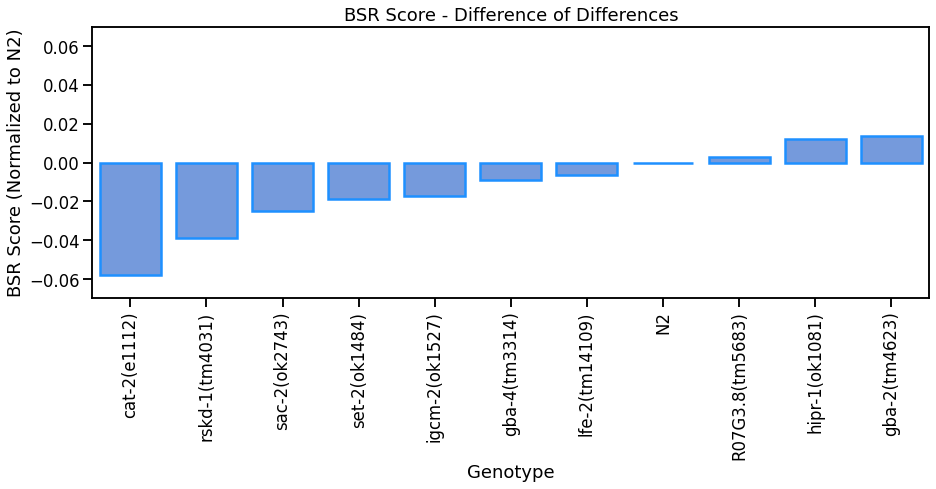

In [16]:
Title = "BSR Score - Difference of Differences"  # <---------------- Input Here -----------------
sns.set_context("talk")
plt.figure(linewidth = 1)
plt.figure(figsize = (15, 5))
plt.gca().xaxis.grid(False)
ax = sns.barplot(x = 'Genotype', 
             y = 'Score_diff_of_diff', 
             data = speed_diff_sorted,  # <--------------- Input Here -------------
             color = 'CornflowerBlue',
             edgecolor = "DodgerBlue",
             linewidth = 2.5,
#              seed=5,
#              ci = 95, # 'sd' for SD, '68' for SEM
#              palette = ['grey',
#                         'black'
#                        ]
                )
plt.xlabel("Genotype")
plt.xticks(rotation = 90)
plt.ylabel("BSR Score (Normalized to N2)")
# plt.ylim(top = 0.1)
# plt.ylim(bottom = -0.1)
plt.ylim(top = 0.07)
plt.ylim(bottom = -0.07)
plt.title(Title)
# plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.savefig(f'{Title}.jpg', format = 'jpg', dpi = 450, bbox_inches = 'tight')
plt.show()

## 4.1.7 - Making the bar plot (difference of percent change)

<Figure size 432x288 with 0 Axes>

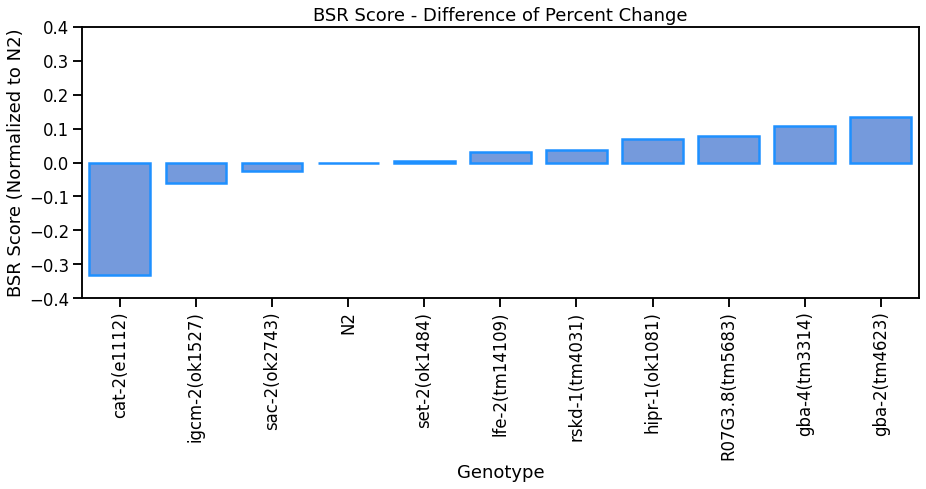

In [17]:
Title = "BSR Score - Difference of Percent Change"  # <---------------- Input Here -----------------
sns.set_context("talk")
plt.figure(linewidth = 1)
plt.figure(figsize = (15, 5))
plt.gca().xaxis.grid(False)
ax = sns.barplot(x = 'Genotype', 
             y = 'Score_diff_of_pct_diff', 
             data = speed_pct_diff_sorted,  # <--------------- Input Here -------------
             color = 'CornflowerBlue',
             edgecolor = "DodgerBlue",
             linewidth = 2.5,
#              seed=5,
#              ci = 95, # 'sd' for SD, '68' for SEM
#              palette = ['grey',
#                         'black'
#                        ]
                )
plt.xlabel("Genotype")
plt.xticks(rotation = 90)
plt.ylabel("BSR Score (Normalized to N2)")
plt.ylim(top = 0.4)
plt.ylim(bottom = -0.4)
plt.title(Title)
# plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.savefig(f'{Title}.jpg', format = 'jpg', dpi = 450, bbox_inches = 'tight')
plt.show()

## 4.2 - Generic differences of differences script (for any behavioural phenotype)

Very little commentary here, as code is similar to that for BSR score apart from inputting behavioural phenotype of interest

<ipython-input-18-8dd2f6277cdc>:9: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  chunkeddata_mean[['Genotype', 'Treatment']] = chunkeddata_mean['Strain'].str.split('_', 1, expand=True)


           Genotype     curve     Score
4      cat-2(e1112)  2.129384 -2.248911
20    set-2(ok1484)  2.676155 -1.702140
18    sac-2(ok2743)  3.418020 -0.960274
2   R07G3.8(tm5683)  3.508874 -0.869421
0                N2  4.378295  0.000000
6     gba-2(tm4623)  4.545092  0.166797
8     gba-4(tm3314)  4.581170  0.202876
12   igcm-2(ok1527)  5.269670  0.891375
14   lfe-2(tm14109)  5.955073  1.576778
10   hipr-1(ok1081)  6.148143  1.769848
16   rskd-1(tm4031)  7.426997  3.048703


<Figure size 432x288 with 0 Axes>

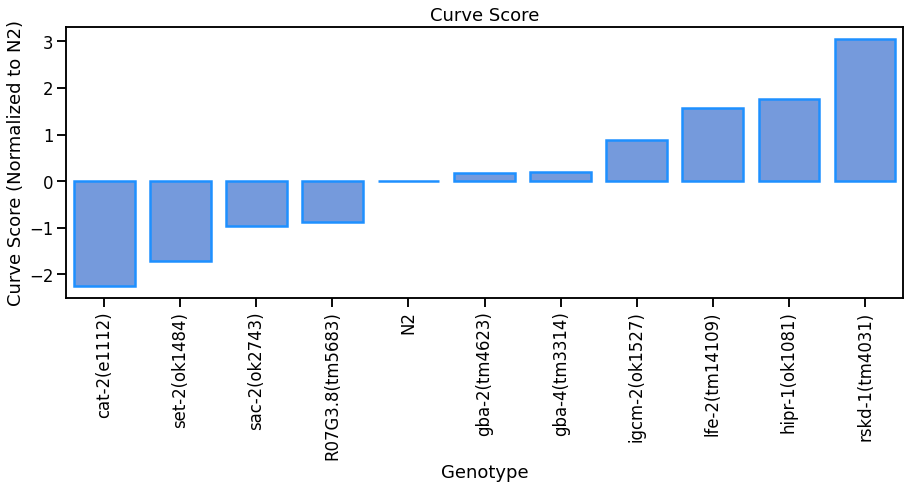

In [18]:
parameter = 'curve'  # <----- INPUT PHENOTYPE OF INTEREST HERE

start = 100 #<----- set the start time of the range
point = 400 #<------- set the end time of your range

chunkeddata0 = TotalConcatenated[TotalConcatenated["time"] >= start]
chunkeddata = chunkeddata0[chunkeddata0["time"] <= point]
chunkeddata_mean = chunkeddata.groupby(["Strain","worm"], as_index=False).mean()
chunkeddata_mean[['Genotype', 'Treatment']] = chunkeddata_mean['Strain'].str.split('_', 1, expand=True)
worm_avg_parameter = chunkeddata_mean[['Genotype', 'Treatment', 'Strain', parameter]]
avg_parameter = worm_avg_parameter.groupby(["Strain", 'Treatment', 'Genotype'], as_index=False).mean()
# print(avg_parameter)

# avg_parameter.to_csv("avg_parameter.csv")

parameter_diff = avg_parameter.drop(columns=["Strain", "Treatment"]).groupby("Genotype", as_index = False).diff(periods = -1).dropna()
parameter_diff.insert(loc = 0, column='Genotype', value = avg_parameter['Genotype'].unique())
parameter_diff.reset_index(drop = True)
# print(parameter_diff)
# print(parameter_diff.iloc[0,1])
parameter_diff['Score'] = parameter_diff[parameter] - parameter_diff.iloc[0,1]
parameter_diff = parameter_diff.sort_values(by = ["Score"])
print(parameter_diff)

#################

# print(parameter_diff.iloc[0,1])

#################

# AGAIN, NOT SURE WHAT THIS IS FOR - BEN
# avg_parameter["new"] = range(1,len(avg_parameter) + 1)
# avg_parameter.loc[avg_parameter.index == 4, 'new'] = 0
# avg_parameter.loc[avg_parameter.index == 4, 'new'] = 0
# print(avg_parameter)
# # avg_parameter.sort_values("new").drop('new', axis=1)

#################

Title = f"{parameter.capitalize()} Score"  # <---------------- Input Here -----------------
sns.set_context("talk")
plt.figure(linewidth = 1)
plt.figure(figsize = (15, 5))
plt.gca().xaxis.grid(False)
ax = sns.barplot(x = "Genotype",
                 y = 'Score',
                 data = parameter_diff,  # <--------------- Input Here -------------
                 color = 'CornflowerBlue',
                 edgecolor = "DodgerBlue",
                 linewidth = 2.5,
                 # seed=5,
                 # ci = 95, # 'sd' for SD, '68' for SEM
                 # palette = ['grey',
                 #            'black'
                 #           ]
                )

plt.xlabel("Genotype")
plt.xticks(rotation = 90)
plt.ylabel(f"{parameter.capitalize()} Score (Normalized to N2)")

# plt.ylim(top = 0.1)
# plt.ylim(bottom = -0.1)
plt.title(Title)
# plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

plt.savefig(f'{Title}.jpg', format = 'jpg', dpi = 450, bbox_inches = 'tight')

plt.show()

# 5 - Phenotype Heatmap

## 5.1 - Calculate difference of differences scores for all behavioural phenotypes

In [19]:
behavioural_phenotypes = ['speed', 'angularspeed', 'bias', 'curve', 'crab', 'kink']
# print(all_strains)

def differences_of_differences(start, point, df):
    chunkeddata0 = df[df["time"] >= start]
    chunkeddata = chunkeddata0[chunkeddata0["time"] <= point]
    chunkeddata_mean = chunkeddata.groupby(["Strain", "worm"], as_index=False).mean()
    chunkeddata_mean[['Genotype', 'Treatment']] = chunkeddata_mean['Strain'].str.split('_', 1, expand=True)
    all_scores = all_strains
    for parameter in behavioural_phenotypes:
        worm_avg_parameter = chunkeddata_mean[['Genotype', 'Treatment', 'Strain', parameter]]
        avg_parameter = worm_avg_parameter.groupby(["Strain", 'Treatment', 'Genotype'], as_index=False).mean()
        # print(avg_parameter)

        # avg_parameter.to_csv("avg_parameter.csv")

        parameter_diff = avg_parameter.drop(columns=["Strain", "Treatment"]).groupby("Genotype", as_index=False).diff(periods=-1).dropna()
        parameter_diff.insert(loc=0, column='Genotype', value = avg_parameter['Genotype'].unique())
        parameter_diff.reset_index(drop=True)
        # print(parameter_diff)
        # print(parameter_diff.iloc[0,1])
        parameter_diff['Score'] = parameter_diff[parameter] - parameter_diff.iloc[0,1]
        # parameter_diff = parameter_diff.sort_values(by = ["Score"])
        parameter_diff = parameter_diff.drop(columns = [parameter])
        parameter_diff = parameter_diff.rename(columns = {'Score':parameter})
        parameter_diff = parameter_diff.reset_index(drop = True)
        # print(parameter_diff)
        all_scores = all_scores.join(parameter_diff.iloc[:,1])
    all_scores = all_scores.set_index("Genotype")
    return(all_scores)

differences_of_differences(100, 400, TotalConcatenated)

<ipython-input-19-bbbe05c132a1>:8: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  chunkeddata_mean[['Genotype', 'Treatment']] = chunkeddata_mean['Strain'].str.split('_', 1, expand=True)


,speed,angularspeed,bias,curve,crab,kink
Genotype,,,,,,
N2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
R07G3.8(tm5683),0.002668,-3.329350,0.255768,-0.869421,-0.004915,-5.084235
cat-2(e1112),-0.057929,-5.076337,-0.033952,-2.248911,-0.008036,-3.657612
gba-2(tm4623),0.013613,-1.829588,0.162525,0.166797,-0.002430,-4.266177
gba-4(tm3314),-0.008786,-4.413686,0.292947,0.202876,-0.006536,-1.960113
hipr-1(ok1081),0.012273,2.839423,0.047216,1.769848,0.000962,-1.596524
igcm-2(ok1527),-0.017080,0.974300,-0.034130,0.891375,-0.000866,2.754734
lfe-2(tm14109),-0.006310,-3.984020,0.168133,1.576778,-0.005193,-1.069553
rskd-1(tm4031),-0.038760,-1.746752,0.208881,3.048703,-0.003528,-4.337853


### 5.1.1 - Use function defined above to store difference of difference dataframe in a new variable

In [20]:
PD_gene_behavioural_scores = differences_of_differences(100, 400, TotalConcatenated)
PD_gene_behavioural_scores = PD_gene_behavioural_scores.dropna().sort_index()
print(PD_gene_behavioural_scores)

                    speed  angularspeed      bias     curve      crab  \
Genotype                                                                
N2               0.000000      0.000000  0.000000  0.000000  0.000000   
R07G3.8(tm5683)  0.002668     -3.329350  0.255768 -0.869421 -0.004915   
cat-2(e1112)    -0.057929     -5.076337 -0.033952 -2.248911 -0.008036   
gba-2(tm4623)    0.013613     -1.829588  0.162525  0.166797 -0.002430   
gba-4(tm3314)   -0.008786     -4.413686  0.292947  0.202876 -0.006536   
hipr-1(ok1081)   0.012273      2.839423  0.047216  1.769848  0.000962   
igcm-2(ok1527)  -0.017080      0.974300 -0.034130  0.891375 -0.000866   
lfe-2(tm14109)  -0.006310     -3.984020  0.168133  1.576778 -0.005193   
rskd-1(tm4031)  -0.038760     -1.746752  0.208881  3.048703 -0.003528   
sac-2(ok2743)   -0.025038     -0.098551 -0.302870 -0.960274 -0.001766   
set-2(ok1484)   -0.018565     -4.370860  0.131982 -1.702140 -0.005824   

                     kink  
Genotype              

<ipython-input-19-bbbe05c132a1>:8: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  chunkeddata_mean[['Genotype', 'Treatment']] = chunkeddata_mean['Strain'].str.split('_', 1, expand=True)


### 5.1.2 - Standardize and normalize the difference of difference scores

In [21]:
PD_gene_behavioural_scores_standardize = (PD_gene_behavioural_scores - PD_gene_behavioural_scores.mean())/PD_gene_behavioural_scores.std()
print(PD_gene_behavioural_scores_standardize)

PD_gene_behavioural_scores_normalize = PD_gene_behavioural_scores_standardize - PD_gene_behavioural_scores_standardize[PD_gene_behavioural_scores_standardize.index == 'N2'].squeeze()
PD_gene_behavioural_scores_normalize = PD_gene_behavioural_scores_normalize.drop(index = 'N2')
print(PD_gene_behavioural_scores_normalize)

                    speed  angularspeed      bias     curve      crab  \
Genotype                                                                
N2               0.603563      0.741536 -0.478435 -0.107648  1.201162   
R07G3.8(tm5683)  0.726653     -0.549484  1.023017 -0.656533 -0.501745   
cat-2(e1112)    -2.068897     -1.226913 -0.677748 -1.527437 -1.583294   
gba-2(tm4623)    1.231570      0.032078  0.475647 -0.002345  0.359040   
gba-4(tm3314)    0.198243     -0.969957  1.241272  0.020432 -1.063445   
hipr-1(ok1081)   1.169771      1.842577 -0.201259  1.009697  1.534445   
igcm-2(ok1527)  -0.184402      1.119339 -0.678788  0.455098  0.901044   
lfe-2(tm14109)   0.312472     -0.803345  0.508569  0.887808 -0.598185   
rskd-1(tm4031)  -1.184545      0.064199  0.747771  1.817067 -0.021456   
sac-2(ok2743)   -0.551518      0.703321 -2.256394 -0.713891  0.589151   
set-2(ok1484)   -0.252909     -0.953350  0.296348 -1.182248 -0.816718   

                     kink  
Genotype              

## 5.2 - Calculate, standardize, and normalize t-scores for all baseline behavioural and morphological phenotypes

### 5.2.1 - Read in and tidy data (same data as used previously)

In [22]:
PD_baseline = pd.read_csv('baseline_output.csv')
PD_baseline = PD_baseline.iloc[:, 1:]
PD_baseline = PD_baseline.drop(columns=["x", "y"])
PD_baseline[['Genotype', 'Treatment']] = PD_baseline['Strain'].str.split('_', 1, expand=True)

print(PD_baseline.head())

<ipython-input-22-53ff4d41d44b>:4: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  PD_baseline[['Genotype', 'Treatment']] = PD_baseline['Strain'].str.split('_', 1, expand=True)


   time_bin  worm   time   speed  angularspeed  pathlength   kink  bias  \
0       4.0   166  3.959  0.1877          9.70     0.02400  49.30   1.0   
1       4.0   242  3.715  0.2145         24.75     0.06700  74.44   1.0   
2       4.0   243  3.803  0.3030         17.75     0.06300  48.25   1.0   
3       4.0   370  3.785  0.2279         32.56     0.05680  19.78   1.0   
4       4.0   462  3.863  0.2375          1.20     0.04565  44.22   1.0   

   curve  dir     crab  length  midline   width  morphwidth     area  \
0  33.80  0.0  0.00420  0.9326    1.055  0.2241     0.16750  0.14870   
1  33.16  0.0  0.04553  0.8833    1.083  0.2542     0.10180  0.11460   
2  31.10  0.0  0.03710  0.8670    1.075  0.2340     0.08795  0.10974   
3  33.97  0.0  0.03903  0.8140    0.973  0.2203     0.23440  0.20390   
4  38.34  0.0  0.00857  0.8057    1.011  0.1313     0.13390  0.11664   

       Strain Genotype Treatment  
0  N2_OffFood       N2   OffFood  
1  N2_OffFood       N2   OffFood  
2  N2_OffFo

### 5.2.2 - Subset the final 100 seconds of the experiment

In [23]:
PD_baseline_last100 = PD_baseline[((PD_baseline.time <= 420) & (PD_baseline.time >= 320))]
PD_baseline_last100 = PD_baseline_last100.reset_index()
PD_baseline_last100 = PD_baseline_last100.dropna()
print(PD_baseline_last100)

          index  time_bin  worm   time     speed  angularspeed  pathlength  \
0        208005     320.0   374  320.0  0.259800      137.0000      -0.034   
1        208536     321.0     9  320.5  0.238800        8.9450      41.840   
2        208537     321.0    11  320.5  0.246200       18.7300       3.623   
3        208538     321.0    12  320.5  0.270300       31.0000      11.030   
4        208539     321.0    14  320.5  0.250000       28.0500       8.390   
...         ...       ...   ...    ...       ...           ...         ...   
321157  1442153     420.0   102  419.5  0.017470        1.9620       3.875   
321158  1442154     420.0   105  419.5  0.014080        0.7153      17.270   
321159  1442155     420.0   106  419.5  0.007717        0.5615      28.580   
321160  1442156     420.0   107  419.5  0.030330        4.4920       4.984   
321161  1442157     420.0   108  419.5  0.022920        3.0080       7.016   

         kink    bias  curve       dir      crab  length  midli

### 5.2.3 - Generate list of all strains in data set

In [24]:
list = PD_baseline_last100["Genotype"].unique()
print(list)

['N2' 'R07G3.8(tm5683)' 'cat-2(e1112)' 'gba-2(tm4623)' 'gba-4(tm3314)'
 'hipr-1(ok1081)' 'igcm-2(ok1527)' 'lfe-2(tm14109)' 'rskd-1(tm4031)'
 'sac-2(ok2743)' 'set-2(ok1484)']


### 5.2.4 - Separate OffFood and OnFood data for comparison of behaviour within conditions

In [25]:
PD_baseline_last100_OffFood = PD_baseline_last100[PD_baseline_last100["Treatment"] == "OffFood"].dropna().add_suffix('_OffFood')
PD_baseline_last100_OffFood = PD_baseline_last100_OffFood.rename(columns = {'Genotype_OffFood': 'Genotype'})

PD_baseline_last100_OnFood = PD_baseline_last100[PD_baseline_last100["Treatment"] == "OnFood"].dropna().add_suffix('_OnFood')
PD_baseline_last100_OnFood = PD_baseline_last100_OnFood.rename(columns = {'Genotype_OnFood': 'Genotype'})

### 5.2.5 - Generate empty dataframes for each measure of phenotype (scores will be added to these)

In [26]:
PD_gene_baseline_length_T = pd.DataFrame(columns = ["Genotype", "length"])
PD_gene_baseline_midline_T = pd.DataFrame(columns = ["Genotype", "midline"])
PD_gene_baseline_width_T = pd.DataFrame(columns = ["Genotype", "width"])
PD_gene_baseline_morphwidth_T = pd.DataFrame(columns = ["Genotype", "morphwidth"])
PD_gene_baseline_area_T = pd.DataFrame(columns = ["Genotype", "area"])

PD_gene_baseline_speed_T_OffFood = pd.DataFrame(columns = ["Genotype", "speed_OffFood"])
PD_gene_baseline_angularspeed_T_OffFood = pd.DataFrame(columns = ["Genotype", "angularspeed_OffFood"])
PD_gene_baseline_bias_T_OffFood = pd.DataFrame(columns = ["Genotype", "bias_OffFood"])
PD_gene_baseline_curve_T_OffFood = pd.DataFrame(columns = ["Genotype", "curve_OffFood"])
PD_gene_baseline_crab_T_OffFood = pd.DataFrame(columns = ["Genotype", "crab_OffFood"])
PD_gene_baseline_kink_T_OffFood = pd.DataFrame(columns = ["Genotype", "kink_OffFood"])

PD_gene_baseline_speed_T_OnFood = pd.DataFrame(columns = ["Genotype", "speed_OnFood"])
PD_gene_baseline_angularspeed_T_OnFood = pd.DataFrame(columns = ["Genotype", "angularspeed_OnFood"])
PD_gene_baseline_bias_T_OnFood = pd.DataFrame(columns = ["Genotype", "bias_OnFood"])
PD_gene_baseline_curve_T_OnFood = pd.DataFrame(columns = ["Genotype", "curve_OnFood"])
PD_gene_baseline_crab_T_OnFood = pd.DataFrame(columns = ["Genotype", "crab_OnFood"])
PD_gene_baseline_kink_T_OnFood = pd.DataFrame(columns = ["Genotype", "kink_OnFood"])

# print(PD_gene_baseline_midline_T)

### 5.2.6 - Define t-test function

In [27]:
def TTest_Gene(DatasetList, Type, DF_ref, output):
    for a in DatasetList:
        Tstat = ttest_ind(DF_ref[DF_ref.Genotype == a][Type], DF_ref[DF_ref.Genotype == "N2"][Type], equal_var = False)[0]
        row = [a, Tstat]
        output.loc[len(output)] = row
    print(output)

### 5.2.7 - Use `TTest_Gene()` function to generate t-scores for each genotype, measure of phenotype, and condition

In [28]:
TTest_Gene(PD_baseline_last100["Genotype"].unique(), "length", PD_baseline_last100, PD_gene_baseline_length_T)
TTest_Gene(PD_baseline_last100["Genotype"].unique(), "midline", PD_baseline_last100, PD_gene_baseline_midline_T)
TTest_Gene(PD_baseline_last100["Genotype"].unique(), "width", PD_baseline_last100, PD_gene_baseline_width_T)
TTest_Gene(PD_baseline_last100["Genotype"].unique(), "morphwidth", PD_baseline_last100, PD_gene_baseline_morphwidth_T)
TTest_Gene(PD_baseline_last100["Genotype"].unique(), "area", PD_baseline_last100, PD_gene_baseline_area_T)

TTest_Gene(PD_baseline_last100["Genotype"].unique(), "speed_OffFood",
           PD_baseline_last100_OffFood, PD_gene_baseline_speed_T_OffFood)
TTest_Gene(PD_baseline_last100["Genotype"].unique(), "angularspeed_OffFood",
           PD_baseline_last100_OffFood, PD_gene_baseline_angularspeed_T_OffFood)
TTest_Gene(PD_baseline_last100["Genotype"].unique(), "bias_OffFood",
           PD_baseline_last100_OffFood, PD_gene_baseline_bias_T_OffFood)
TTest_Gene(PD_baseline_last100["Genotype"].unique(), "curve_OffFood",
           PD_baseline_last100_OffFood, PD_gene_baseline_curve_T_OffFood)
TTest_Gene(PD_baseline_last100["Genotype"].unique(), "crab_OffFood",
           PD_baseline_last100_OffFood, PD_gene_baseline_crab_T_OffFood)
TTest_Gene(PD_baseline_last100["Genotype"].unique(), "kink_OffFood",
           PD_baseline_last100_OffFood, PD_gene_baseline_kink_T_OffFood)

TTest_Gene(PD_baseline_last100["Genotype"].unique(), "speed_OnFood",
           PD_baseline_last100_OnFood, PD_gene_baseline_speed_T_OnFood)
TTest_Gene(PD_baseline_last100["Genotype"].unique(), "angularspeed_OnFood",
           PD_baseline_last100_OnFood, PD_gene_baseline_angularspeed_T_OnFood)
TTest_Gene(PD_baseline_last100["Genotype"].unique(), "bias_OnFood",
           PD_baseline_last100_OnFood, PD_gene_baseline_bias_T_OnFood)
TTest_Gene(PD_baseline_last100["Genotype"].unique(), "curve_OnFood",
           PD_baseline_last100_OnFood, PD_gene_baseline_curve_T_OnFood)
TTest_Gene(PD_baseline_last100["Genotype"].unique(), "crab_OnFood",
           PD_baseline_last100_OnFood, PD_gene_baseline_crab_T_OnFood)
TTest_Gene(PD_baseline_last100["Genotype"].unique(), "kink_OnFood",
           PD_baseline_last100_OnFood, PD_gene_baseline_kink_T_OnFood)

           Genotype      length
0                N2    0.000000
1   R07G3.8(tm5683)   16.483056
2      cat-2(e1112)  -56.269253
3     gba-2(tm4623)  -53.158078
4     gba-4(tm3314)  -21.875496
5    hipr-1(ok1081)  -90.858139
6    igcm-2(ok1527)  -74.607594
7    lfe-2(tm14109)   54.290409
8    rskd-1(tm4031) -135.587794
9     sac-2(ok2743)  -55.015440
10    set-2(ok1484) -146.529812
           Genotype     midline
0                N2    0.000000
1   R07G3.8(tm5683)  -19.011565
2      cat-2(e1112)  -42.054900
3     gba-2(tm4623)  -95.773314
4     gba-4(tm3314)  -75.423044
5    hipr-1(ok1081) -108.750670
6    igcm-2(ok1527)  -84.087971
7    lfe-2(tm14109)   62.974980
8    rskd-1(tm4031) -177.199850
9     sac-2(ok2743)  -39.036855
10    set-2(ok1484) -260.012825
           Genotype      width
0                N2   0.000000
1   R07G3.8(tm5683) -45.286536
2      cat-2(e1112)  40.429079
3     gba-2(tm4623) -37.197459
4     gba-4(tm3314) -75.318120
5    hipr-1(ok1081)   9.065174
6    igcm-2(ok1

### 5.2.8 - Combine all dataframes generated in step 5.2.7

In [29]:
PD_gene_baseline_Tstats = PD_gene_baseline_length_T
PD_gene_baseline_Tstats = PD_gene_baseline_Tstats.join(PD_gene_baseline_midline_T.iloc[:,1])
PD_gene_baseline_Tstats = PD_gene_baseline_Tstats.join(PD_gene_baseline_width_T.iloc[:,1])
PD_gene_baseline_Tstats = PD_gene_baseline_Tstats.join(PD_gene_baseline_morphwidth_T.iloc[:,1])
PD_gene_baseline_Tstats = PD_gene_baseline_Tstats.join(PD_gene_baseline_area_T.iloc[:,1])

PD_gene_baseline_Tstats = PD_gene_baseline_Tstats.join(PD_gene_baseline_speed_T_OffFood.iloc[:,1])
PD_gene_baseline_Tstats = PD_gene_baseline_Tstats.join(PD_gene_baseline_angularspeed_T_OffFood.iloc[:,1])
PD_gene_baseline_Tstats = PD_gene_baseline_Tstats.join(PD_gene_baseline_bias_T_OffFood.iloc[:,1])
PD_gene_baseline_Tstats = PD_gene_baseline_Tstats.join(PD_gene_baseline_curve_T_OffFood.iloc[:,1])
PD_gene_baseline_Tstats = PD_gene_baseline_Tstats.join(PD_gene_baseline_crab_T_OffFood.iloc[:,1])
PD_gene_baseline_Tstats = PD_gene_baseline_Tstats.join(PD_gene_baseline_kink_T_OffFood.iloc[:,1])

PD_gene_baseline_Tstats = PD_gene_baseline_Tstats.join(PD_gene_baseline_speed_T_OnFood.iloc[:,1])
PD_gene_baseline_Tstats = PD_gene_baseline_Tstats.join(PD_gene_baseline_angularspeed_T_OnFood.iloc[:,1])
PD_gene_baseline_Tstats = PD_gene_baseline_Tstats.join(PD_gene_baseline_bias_T_OnFood.iloc[:,1])
PD_gene_baseline_Tstats = PD_gene_baseline_Tstats.join(PD_gene_baseline_curve_T_OnFood.iloc[:,1])
PD_gene_baseline_Tstats = PD_gene_baseline_Tstats.join(PD_gene_baseline_crab_T_OnFood.iloc[:,1])
PD_gene_baseline_Tstats = PD_gene_baseline_Tstats.join(PD_gene_baseline_kink_T_OnFood.iloc[:,1])

PD_gene_baseline_Tstats = PD_gene_baseline_Tstats.set_index("Genotype")
print(PD_gene_baseline_Tstats)

                     length     midline      width  morphwidth        area  \
Genotype                                                                     
N2                 0.000000    0.000000   0.000000    0.000000    0.000000   
R07G3.8(tm5683)   16.483056  -19.011565 -45.286536  -23.672209   -8.875923   
cat-2(e1112)     -56.269253  -42.054900  40.429079   15.231186  -32.520982   
gba-2(tm4623)    -53.158078  -95.773314 -37.197459  -91.309138 -161.265268   
gba-4(tm3314)    -21.875496  -75.423044 -75.318120  -79.190786 -123.175722   
hipr-1(ok1081)   -90.858139 -108.750670   9.065174  -24.302509 -109.904018   
igcm-2(ok1527)   -74.607594  -84.087971  16.834926   14.071444  -62.311014   
lfe-2(tm14109)    54.290409   62.974980   0.023915   18.130469   49.468157   
rskd-1(tm4031)  -135.587794 -177.199850 -38.244528  -52.170800 -153.794442   
sac-2(ok2743)    -55.015440  -39.036855  30.651788   25.031645  -18.219690   
set-2(ok1484)   -146.529812 -260.012825 -98.528556 -139.962875 -

### 5.2.9 - Standardize and normalize t-scores

In [30]:
PD_gene_baseline_Tstats = PD_gene_baseline_Tstats.dropna().sort_index()

PD_gene_baseline_Tstats_standardize = (PD_gene_baseline_Tstats - PD_gene_baseline_Tstats.mean())/PD_gene_baseline_Tstats.std()
print(PD_gene_baseline_Tstats_standardize)

PD_gene_baseline_Tstats_normalize = PD_gene_baseline_Tstats_standardize - PD_gene_baseline_Tstats_standardize[PD_gene_baseline_Tstats_standardize.index == 'N2'].squeeze()
PD_gene_baseline_Tstats_normalize = PD_gene_baseline_Tstats_normalize.drop(index = 'N2')
print(PD_gene_baseline_Tstats_normalize)

                   length   midline     width  morphwidth      area  \
Genotype                                                              
N2               0.835269  0.871469  0.404985    0.570228  0.891459   
R07G3.8(tm5683)  1.104205  0.654087 -0.616140    0.131113  0.791848   
cat-2(e1112)    -0.082816  0.390605  1.316582    0.852765  0.526486   
gba-2(tm4623)   -0.032054 -0.223622 -0.433746   -1.123543 -0.918372   
gba-4(tm3314)    0.478350  0.009067 -1.293294   -0.898749 -0.490904   
hipr-1(ok1081)  -0.647166 -0.372008  0.609387    0.119421 -0.341960   
igcm-2(ok1527)  -0.382023 -0.090010  0.784580    0.831252  0.192162   
lfe-2(tm14109)   1.721067  1.591537  0.405524    0.906546  1.446625   
rskd-1(tm4031)  -1.376971 -1.154669 -0.457356   -0.397532 -0.834529   
sac-2(ok2743)   -0.062359  0.425114  1.096123    1.034562  0.686985   
set-2(ok1484)   -1.555500 -2.101568 -1.816645   -2.026062 -1.949800   

                 speed_OffFood  angularspeed_OffFood  bias_OffFood  \
Genoty

## 5.3 - Generate phenotype heatmap with all measures

### 5.3.1 - Combine dataframe containing morphology and behaviour t-scores with dataframe containing difference of difference scores

In [31]:
full_heatmap = PD_gene_baseline_Tstats_normalize.join(PD_gene_behavioural_scores_normalize)
print(full_heatmap)

                   length   midline     width  morphwidth      area  \
Genotype                                                              
R07G3.8(tm5683)  0.268936 -0.217382 -1.021124   -0.439116 -0.099612   
cat-2(e1112)    -0.918085 -0.480864  0.911598    0.282536 -0.364973   
gba-2(tm4623)   -0.867323 -1.095091 -0.838731   -1.693771 -1.809831   
gba-4(tm3314)   -0.356919 -0.862402 -1.698278   -1.468977 -1.382364   
hipr-1(ok1081)  -1.482434 -1.243476  0.204402   -0.450808 -1.233419   
igcm-2(ok1527)  -1.217292 -0.961478  0.379595    0.261023 -0.699298   
lfe-2(tm14109)   0.885798  0.720068  0.000539    0.336318  0.555166   
rskd-1(tm4031)  -2.212240 -2.026137 -0.862340   -0.967761 -1.725988   
sac-2(ok2743)   -0.897628 -0.446355  0.691139    0.464333 -0.204474   
set-2(ok1484)   -2.390769 -2.973037 -2.221629   -2.596291 -2.841260   

                 speed_OffFood  angularspeed_OffFood  bias_OffFood  \
Genotype                                                             
R07G3.8

### 5.3.2 - Produce and save heatmap

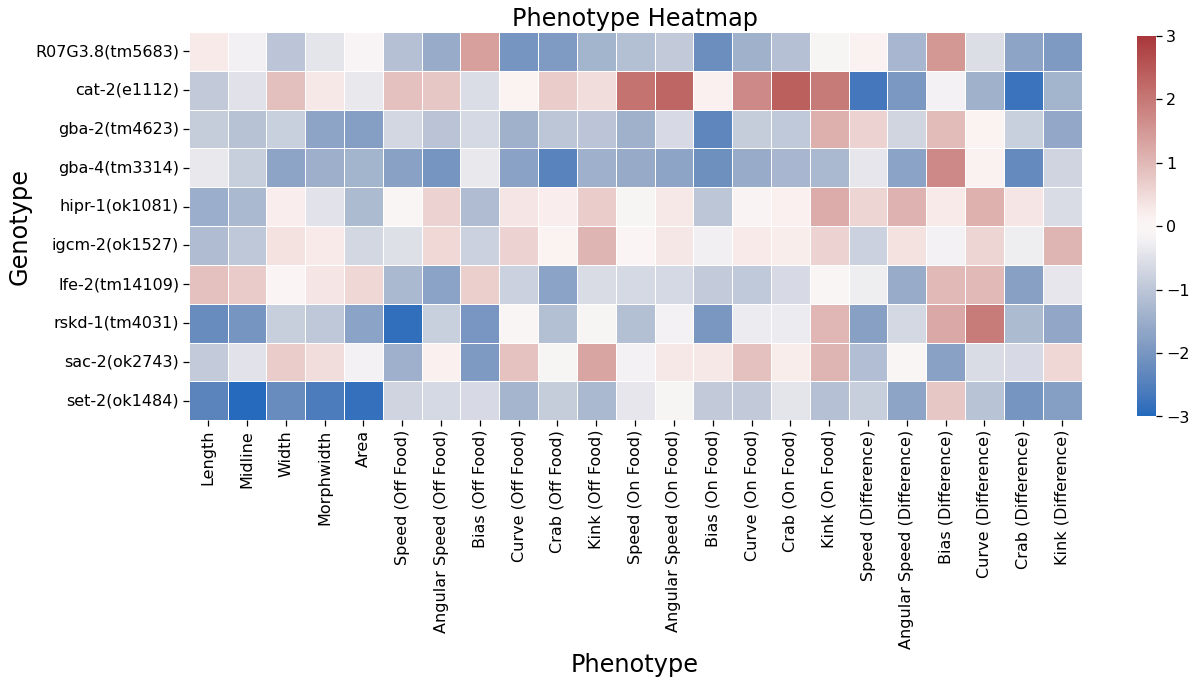

In [32]:
sns.set_context('notebook')
plt.figure(figsize = (20,14))
plt.rc('xtick', labelsize = 16)
plt.rc('ytick', labelsize = 16) 
ax = sns.heatmap(data = full_heatmap, 
                 annot = False, 
                 linewidth = 0.5, 
                 square = True, 
                 cmap = "vlag", 
                 center = 0, 
                 vmax = 3,
                 vmin = -3, 
                 # xticklabels = 1,
                 xticklabels = ['Length', 'Midline', 'Width', 'Morphwidth', 'Area',
                                'Speed (Off Food)', 'Angular Speed (Off Food)', 'Bias (Off Food)',
                                'Curve (Off Food)', 'Crab (Off Food)', 'Kink (Off Food)',
                                'Speed (On Food)', 'Angular Speed (On Food)', 'Bias (On Food)',
                                'Curve (On Food)', 'Crab (On Food)', 'Kink (On Food)',
                                'Speed (Difference)', 'Angular Speed (Difference)', 'Bias (Difference)',
                                'Curve (Difference)', 'Crab (Difference)', 'Kink (Difference)'],
                 yticklabels = 1,
                 cbar_kws = {"shrink": .5,
                             # "label": "Normalized Behaviour Score"
                            })
ax.set_ylabel('Genotype', fontsize = 24)
ax.set_xlabel('Phenotype', fontsize = 24)
ax.set_title('Phenotype Heatmap', fontsize = 24)
# plt.savefig('BehaviourScore_GENE_normalized2_square.jpg', format='jpg', dpi=450, bbox_inches = "tight")
plt.savefig('Complete_GENE_heatmap_normalized_square.jpg', format = 'jpg', dpi = 450, bbox_inches = "tight")
plt.show()

# Everything below not intended for large scale analysis of many strains, and include bugs that would need to be fixed (commented out so notebook can be run start to finish)

# Graphing Bar Graphs

## Speed Barplots Comparison

In [33]:
# # Valid Measurement inputs(change var)
# # 1:'speed', <---
# # 2: "x",
# # 3: "y",
# # 4: "angularspeed", <-----
# # 5: "pathlength",
# # 6: "kink",  <---
# # 7: "bias", <----
# # 8: "curve", <---
# # 9: "dir",<----
# # 10: "crab",<----
# # 11: "length",<---
# # 12: "midline",<----
# # 13: "width",<----
# # 14: "morphwidth",<----
# # 15: "area"<----

# start = 200
# point = 400
# var = "area"
# chunkeddata0 = TotalConcatenated[TotalConcatenated["time"] >= start]
# chunkeddata = chunkeddata0[chunkeddata0["time"] <= point]
# chunkeddata_mean = chunkeddata.groupby(["Strain","worm"], as_index=False).mean()
# chunkeddata_mean[['Genotype', 'Treatment']] = chunkeddata_mean['Strain'].str.split(' - ', 1, expand=True)

# Title = f"{var} - {start}-{point} seconds" #<---------------- Input Here -----------------
# sns.set_context("talk")
# plt.figure(linewidth = 2.5)
# plt.figure(figsize=(15, 3))
# plt.gca().xaxis.grid(False)
# ax = sns.barplot(x="Genotype", 
#              y = var, 
#              data = chunkeddata_mean, #<--------------- Input Here -------------
#              hue = 'Treatment',
#              edgecolor="black",
#              linewidth = 2.5,
# #              seed=5,
#              ci = 95, # 'sd' for SD, '68' for SEM
#              palette = ['grey',
#                         'black'
#                        ]
#                 )
# plt.xlabel("Strain and Condition")
# # plt.ylabel("Average Speed (mm/s)")
# plt.title(Title)
# plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
# plt.savefig(f'{Title}.png', format='png', dpi=450, bbox_inches = 'tight')
# plt.show()

In [34]:
# Test Cell
# chunkeddata_mean

In [35]:
# Test Cell
# TotalConcatenated.describe()
# chunkeddata0
# chunkeddata

## Bias Barplots Comparison

In [36]:
# point = 420
# var = "bias"
# chunkeddata0 = TotalConcatenated[TotalConcatenated["time"] >= 0]
# chunkeddata = chunkeddata0[chunkeddata0["time"] <= point]

# Title = f"{var} - First {point} seconds" #<---------------- Input Here -----------------
# sns.set_context("talk")
# plt.figure(linewidth = 2.5)
# plt.figure(figsize=(15, 5))
# plt.gca().xaxis.grid(False)
# ax = sns.barplot(x="Genotype", 
#              y = var, 
#              data = chunkeddata, #<--------------- Input Here -------------
#              hue = 'Treatment',
#              edgecolor="black",
#              linewidth = 2.5,
#              ci = None,
#              palette = ['black',
#                         'grey'
#                        ]
#                 )
# plt.xlabel("Strain and Condition")
# # plt.ylabel("Average Speed (mm/s)")
# plt.title(Title)
# plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
# # plt.savefig(f'{Title}.png', format='png', dpi=450, bbox_inches = 'tight')
# plt.show()